In [2]:
import os
import csv
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Final_Datasets/MergedTVandMovies.csv")  
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
1,1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,Movie,NaN
2,2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,Movie,NaN
3,3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,Movie,NaN
4,4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,Movie,NaN


In [4]:
genredf = df[["Genres", "Netflix", "Hulu", "Prime Video", "Disney+"]]
genredf.head()

,Genres,Netflix,Hulu,Prime Video,Disney+
0,"Action,Adventure,Sci-Fi,Thriller",1,0,0,0
1,"Action,Sci-Fi",1,0,0,0
2,"Action,Adventure,Sci-Fi",1,0,0,0
3,"Adventure,Comedy,Sci-Fi",1,0,0,0
4,Western,1,0,1,0


In [5]:
genredata = genredf.groupby('Genres')
genredata.head()

,Genres,Netflix,Hulu,Prime Video,Disney+
0,"Action,Adventure,Sci-Fi,Thriller",1,0,0,0
1,"Action,Sci-Fi",1,0,0,0
2,"Action,Adventure,Sci-Fi",1,0,0,0
3,"Adventure,Comedy,Sci-Fi",1,0,0,0
4,Western,1,0,1,0
...,...,...,...,...,...
16718,"Documentary,Drama,History",0,0,0,1
16719,"Animation,Adventure,Drama,Family,Musical,Romance",0,0,0,1
16721,"Comedy,Family,Adventure,Fantasy,Sci-Fi",0,0,0,1
16739,"Comedy,Family,Fantasy,Horror",0,0,0,1


In [6]:
#split up genres 
df['Genres'] = df['Genres'].str.split(',')
df = df.explode('Genres')
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,movies,shows
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,Action,"United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,Adventure,"United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,Sci-Fi,"United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
0,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,Thriller,"United States,United Kingdom","English,Japanese,French",148.0,Movie,NaN
1,1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski",Action,United States,English,136.0,Movie,NaN


In [7]:
#ignore irrelevant data
genredf = df[["Genres", "Netflix", "Hulu", "Prime Video", "Disney+"]]
genredf.head()

,Genres,Netflix,Hulu,Prime Video,Disney+
0,Action,1,0,0,0
0,Adventure,1,0,0,0
0,Sci-Fi,1,0,0,0
0,Thriller,1,0,0,0
1,Action,1,0,0,0


In [8]:
#group
gengroup = genredf.groupby('Genres')
gengroup.head()

,Genres,Netflix,Hulu,Prime Video,Disney+
0,Action,1,0,0,0
0,Adventure,1,0,0,0
0,Sci-Fi,1,0,0,0
0,Thriller,1,0,0,0
1,Action,1,0,0,0
...,...,...,...,...,...
4512,Film-Noir,0,0,1,0
4558,Film-Noir,0,0,1,0
4978,Game-Show,0,0,1,0
8491,Game-Show,0,0,1,0


In [9]:
#totals per genre
gencount = gengroup.count()
gencount.head()

,Netflix,Hulu,Prime Video,Disney+
Genres,,,,
Action,2683,2683,2683,2683
Adventure,1778,1778,1778,1778
Animation,711,711,711,711
Biography,821,821,821,821
Comedy,4637,4637,4637,4637


In [10]:
total = gengroup["Genres"].count()
gencount["Total"] = total

gencount

,Netflix,Hulu,Prime Video,Disney+,Total
Genres,,,,,
Action,2683,2683,2683,2683,2683
Adventure,1778,1778,1778,1778,1778
Animation,711,711,711,711,711
Biography,821,821,821,821,821
Comedy,4637,4637,4637,4637,4637
Crime,1833,1833,1833,1833,1833
Documentary,2546,2546,2546,2546,2546
Drama,7227,7227,7227,7227,7227
Family,1514,1514,1514,1514,1514


In [11]:
#totals per streaming service
streamtot = gengroup.sum()
streamtot

,Netflix,Hulu,Prime Video,Disney+
Genres,,,,
Action,545,129,2049,88
Adventure,318,111,1166,258
Animation,222,75,296,146
Biography,199,58,569,18
Comedy,1308,272,3004,281
Crime,372,100,1423,24
Documentary,511,132,1895,63
Drama,1501,438,5437,162
Family,315,105,721,430


In [12]:
total = gengroup["Genres"].count()
streamtot["Total"] = total

streamtot

,Netflix,Hulu,Prime Video,Disney+,Total
Genres,,,,,
Action,545,129,2049,88,2683
Adventure,318,111,1166,258,1778
Animation,222,75,296,146,711
Biography,199,58,569,18,821
Comedy,1308,272,3004,281,4637
Crime,372,100,1423,24,1833
Documentary,511,132,1895,63,2546
Drama,1501,438,5437,162,7227
Family,315,105,721,430,1514


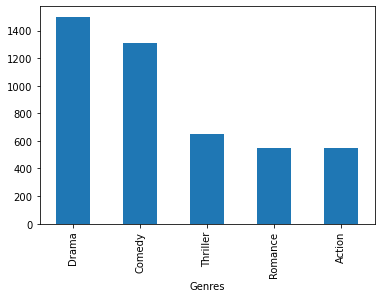

In [13]:
#netflix top 5
netdf = streamtot.sort_values("Netflix", ascending=False)
topnet = netdf["Netflix"].nlargest(5)
topnet.plot.bar()

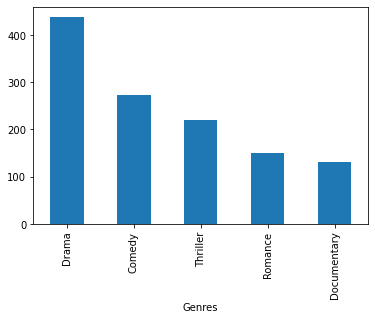

In [14]:
#hulu top 5
huludf = streamtot.sort_values("Hulu", ascending=False)
tophulu = huludf["Hulu"].nlargest(5)
tophulu.plot.bar()

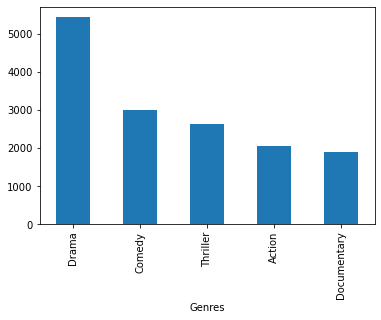

In [15]:
#prime top 5
primedf = streamtot.sort_values("Prime Video", ascending=False)
topprime = primedf["Prime Video"].nlargest(5)
topprime.plot.bar()

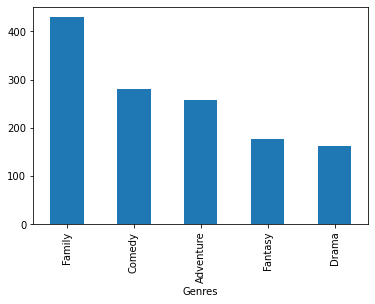

In [16]:
#disney top 5
disdf = streamtot.sort_values("Disney+", ascending=False)
topdis = disdf["Disney+"].nlargest(5)
topdis.plot.bar()

In [17]:
#all time top 5
topdf = total.sort_values(ascending=False).nlargest(5)
topdf.head()

Genres
Drama          7227
Comedy         4637
Thriller       3354
Action         2683
Documentary    2546
Name: Genres, dtype: int64

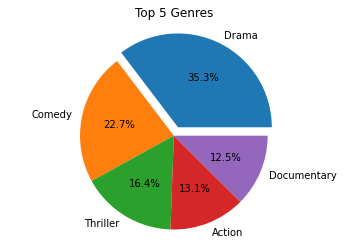

In [18]:
my_labels = 'Drama', 'Comedy', 'Thriller', 'Action', 'Documentary'
my_explode = (0.1, 0, 0, 0, 0)
plt.pie(topdf,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Top 5 Genres')
plt.axis('equal')
plt.show()

In [19]:
#top5 for all
top9 = total[["Drama", "Comedy", "Thriller", "Action", "Romance", "Documentary", "Family", "Fantasy", "Adventure"]]

top9

Genres
Drama          7227
Comedy         4637
Thriller       3354
Action         2683
Romance        2359
Documentary    2546
Family         1514
Fantasy        1089
Adventure      1778
Name: Genres, dtype: int64

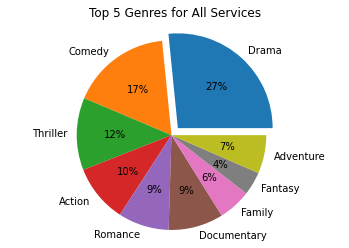

In [21]:
my_labels = 'Drama', 'Comedy', 'Thriller', 'Action', 'Romance','Documentary','Family', 'Fantasy', 'Adventure'
my_explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(top9,labels=my_labels,autopct='%1.0f%%', explode=my_explode)
plt.title('Top 5 Genres for All Services')
plt.axis('equal')
plt.show()

In [72]:
leastdf = streamtot.sort_values("Total", ascending=True)
leastdf.head()

,Netflix,Hulu,Prime Video,Disney+,Total
Genres,,,,,
Game-Show,1,1,5,0,7
Talk-Show,5,1,14,0,19
Reality-TV,7,2,11,2,22
Film-Noir,1,1,77,0,79
News,8,5,93,1,105
